# Organic Super Store Prediction

# Life cycle of Machine learning Project
1. Understanding the Problem Statement

2. Data Collection

3. Data Checks to perform

4. Exploratory data analysis

5. Data Pre-Processing

6. Model Training
7. Choose best model

## 1) Problem statement

The supermarket's management wants to determine which customers are likely to purchase these products. By analyzing variables such as 
'Gender', 'Geographic Region', 'Loyalty Status','Neigborhood Cluster-55 Level', 'Neighborhood Cluster-7 Level','Television Region', 'Affluence Grade', 'Age','Loyalty Card Tenure'

## 2) Data Collection
Dataset Source -https://www.kaggle.com/datasets/papercool/organics-purchase-indicator

The ORGANICS data set contains 13 variables and over 22,000 observations.

### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from phik import resources, report
from scipy.stats import pointbiserialr
from scipy import stats
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/organics.csv') 

## Show Top 5 Records

In [3]:
df.head()

,Customer Loyalty ID,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,140,U,Midlands,Gold,16.0,C,Wales & West,10,76,1,0.00%,4,0,0,16000.00
1,620,U,Midlands,Gold,35.0,D,Wales & West,4,49,1,0.00%,5,0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70,1,0.00%,8,1,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65,1,0.00%,7,1,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68,1,0.00%,8,0,0,0.01


## Shape of the dataset

In [4]:
df.shape

(22223, 15)

# 3. Data Checks to perform
1.  Check data type

2. Check Duplicates

3. Drop Unwanted Features

4. Check Missing values

5. Check the number of unique values of each column

6. Check statistics of data set

7. Check various categories present in the different categorical column

## 3.1 Check Data Types

In [5]:
df.dtypes

Customer Loyalty ID               int64
Gender                           object
Geographic Region                object
Loyalty Status                   object
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level     object
Television Region                object
Affluence Grade                  object
Age                              object
Frequency                         int64
Frequency Percent                object
Loyalty Card Tenure              object
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

### Convert some of the feature into numerical 

In [6]:
def convert_column_to_int(df, column_name):
    for i, x in enumerate(df[column_name]):
        try:
            df.iloc[i, df.columns.get_loc(column_name)] = int(x)
        except ValueError:
            df.iloc[i, df.columns.get_loc(column_name)] = np.NaN

In [7]:
columns_to_convert = ['Affluence Grade', 'Age', 'Loyalty Card Tenure']

for column in columns_to_convert:
    convert_column_to_int(df, column)

In [8]:
df.dtypes

Customer Loyalty ID               int64
Gender                           object
Geographic Region                object
Loyalty Status                   object
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level     object
Television Region                object
Affluence Grade                  object
Age                              object
Frequency                         int64
Frequency Percent                object
Loyalty Card Tenure              object
Organics Purchase Count           int64
Organics Purchase Indicator       int64
Total Spend                     float64
dtype: object

In [9]:
df.groupby('Gender').size()

Gender
F    12149
M     5815
U     1747
dtype: int64

### Converting  unknown 'U' values to Nan

In [10]:
i = 0
for x in df['Gender']:
    if x == 'U':
        df.iloc[i, df.columns.get_loc('Gender')] = np.NaN
    i = i + 1

### Renaming the Target feature

In [11]:
df.rename(inplace=True, columns={'Organics Purchase Indicator': 'ORGANICS'}) 
df.columns

Index(['Customer Loyalty ID', 'Gender', 'Geographic Region', 'Loyalty Status',
       'Neigborhood Cluster-55 Level', 'Neighborhood Cluster-7 Level',
       'Television Region', 'Affluence Grade', 'Age', 'Frequency',
       'Frequency Percent', 'Loyalty Card Tenure', 'Organics Purchase Count',
       'ORGANICS', 'Total Spend'],
      dtype='object')

## 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

0

## 3.3 Drop Unwanted columns

In [13]:
df.drop(['Customer Loyalty ID','Organics Purchase Count','Frequency','Frequency Percent','Total Spend'], axis=1, inplace=True)
df.head()

,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Television Region,Affluence Grade,Age,Loyalty Card Tenure,ORGANICS
0,NaN,Midlands,Gold,16.0,C,Wales & West,10,76,4,0
1,NaN,Midlands,Gold,35.0,D,Wales & West,4,49,5,0
2,F,Midlands,Silver,27.0,D,Wales & West,5,70,8,1
3,M,Midlands,Tin,51.0,F,Midlands,10,65,7,1
4,F,Midlands,Tin,4.0,A,Midlands,11,68,8,0


## 3.3 Check Missing values

In [14]:
df.isnull().sum()

Gender                          4259
Geographic Region                465
Loyalty Status                     0
Neigborhood Cluster-55 Level     674
Neighborhood Cluster-7 Level     674
Television Region                465
Affluence Grade                 1085
Age                             1508
Loyalty Card Tenure              281
ORGANICS                           0
dtype: int64

### 3.3.1 Handle Missing values if the column is 'categorical' then we will apply forward fill method and if the column is 'Numerical' then we will apply mean

In [15]:
columns_to_fill_mean = ['Affluence Grade', 'Age', 'Loyalty Card Tenure']

df.dropna(subset=columns_to_fill_mean, inplace=True)
df[columns_to_fill_mean] = df[columns_to_fill_mean].astype(int)

mask_organics_1 = (df['ORGANICS'] == 1)
# Forward fill for object columns where 'Organics' is 1
df.loc[mask_organics_1, df.select_dtypes(include='object').columns] = \
    df.loc[mask_organics_1, df.select_dtypes(include='object').columns].fillna(method='ffill')

# Drop rows where 'Organics' is 0 and have missing values
df.dropna(subset=df.columns[df.isnull().any()], inplace=True)

### After Changing the Data types of some features

In [16]:
df.dtypes

Gender                           object
Geographic Region                object
Loyalty Status                   object
Neigborhood Cluster-55 Level    float64
Neighborhood Cluster-7 Level     object
Television Region                object
Affluence Grade                   int32
Age                               int32
Loyalty Card Tenure               int32
ORGANICS                          int64
dtype: object

### After handling null values 

In [17]:
df.isnull().sum()

Gender                          0
Geographic Region               0
Loyalty Status                  0
Neigborhood Cluster-55 Level    0
Neighborhood Cluster-7 Level    0
Television Region               0
Affluence Grade                 0
Age                             0
Loyalty Card Tenure             0
ORGANICS                        0
dtype: int64

## 3.4. Check the number of unique values of each column

In [18]:
def print_unique_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].unique()
            print(f"Unique values for '{column}': {unique_values} \n")

In [19]:
print_unique_values(df)

Unique values for 'Gender': ['F' 'M'] 

Unique values for 'Geographic Region': ['Midlands' 'North' 'South East' 'South West' 'Scottish'] 

Unique values for 'Loyalty Status': ['Silver' 'Tin' 'Gold' 'Platinum'] 

Unique values for 'Neighborhood Cluster-7 Level': ['D' 'F' 'A' 'C' 'B' 'E' 'U'] 

Unique values for 'Television Region': ['Wales & West' 'Midlands' 'East' 'N East' 'S & S East' 'London' 'N West'
 'S West' 'Yorkshire' 'Border' 'C Scotland' 'N Scot'] 



## 3.5. Check statistics of data set

### 3.5.1 Statistics of Numerical features

In [20]:
numerical_columns = df.select_dtypes(include=['number']).columns
# Describe for numerical columns
numerical_statistics = df[numerical_columns].describe()
# Print the statistics
print("Numerical Statistics:")
print(numerical_statistics)

Numerical Statistics:
       Neigborhood Cluster-55 Level  Affluence Grade           Age  \
count                  15305.000000     15305.000000  15305.000000   
mean                      27.353741         8.881477     53.392617   
std                       15.744461         3.512235     13.363093   
min                        1.000000         0.000000     18.000000   
25%                       14.000000         6.000000     43.000000   
50%                       27.000000         9.000000     53.000000   
75%                       40.000000        11.000000     64.000000   
max                       55.000000        34.000000     79.000000   

       Loyalty Card Tenure      ORGANICS  
count         15305.000000  15305.000000  
mean              6.549494      0.301143  
std               4.606686      0.458770  
min               0.000000      0.000000  
25%               4.000000      0.000000  
50%               5.000000      0.000000  
75%               8.000000      1.000000  
max

### 3.5.2 Statistics of Categorical features

In [21]:
object_columns = df.select_dtypes(include=['object']).columns
# Describe for object-type columns
object_statistics = df[object_columns].describe()
print("\nObject Statistics:")
print(object_statistics)


Object Statistics:
       Gender Geographic Region Loyalty Status Neighborhood Cluster-7 Level  \
count   15305             15305          15305                        15305   
unique      2                 5              4                            7   
top         F        South East         Silver                            C   
freq    10411              6120           5872                         3238   

       Television Region  
count              15305  
unique                12  
top               London  
freq                4382  


## 3.6. Check various categories present in the different categorical column

In [22]:
def print_unique_categories(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].unique()
            print(f"Unique values for '{column}': {unique_values}")


In [23]:
print_unique_categories(df)

Unique values for 'Gender': ['F' 'M']
Unique values for 'Geographic Region': ['Midlands' 'North' 'South East' 'South West' 'Scottish']
Unique values for 'Loyalty Status': ['Silver' 'Tin' 'Gold' 'Platinum']
Unique values for 'Neighborhood Cluster-7 Level': ['D' 'F' 'A' 'C' 'B' 'E' 'U']
Unique values for 'Television Region': ['Wales & West' 'Midlands' 'East' 'N East' 'S & S East' 'London' 'N West'
 'S West' 'Yorkshire' 'Border' 'C Scotland' 'N Scot']


# EDA 

## Pairwise scatter plot for numerical features

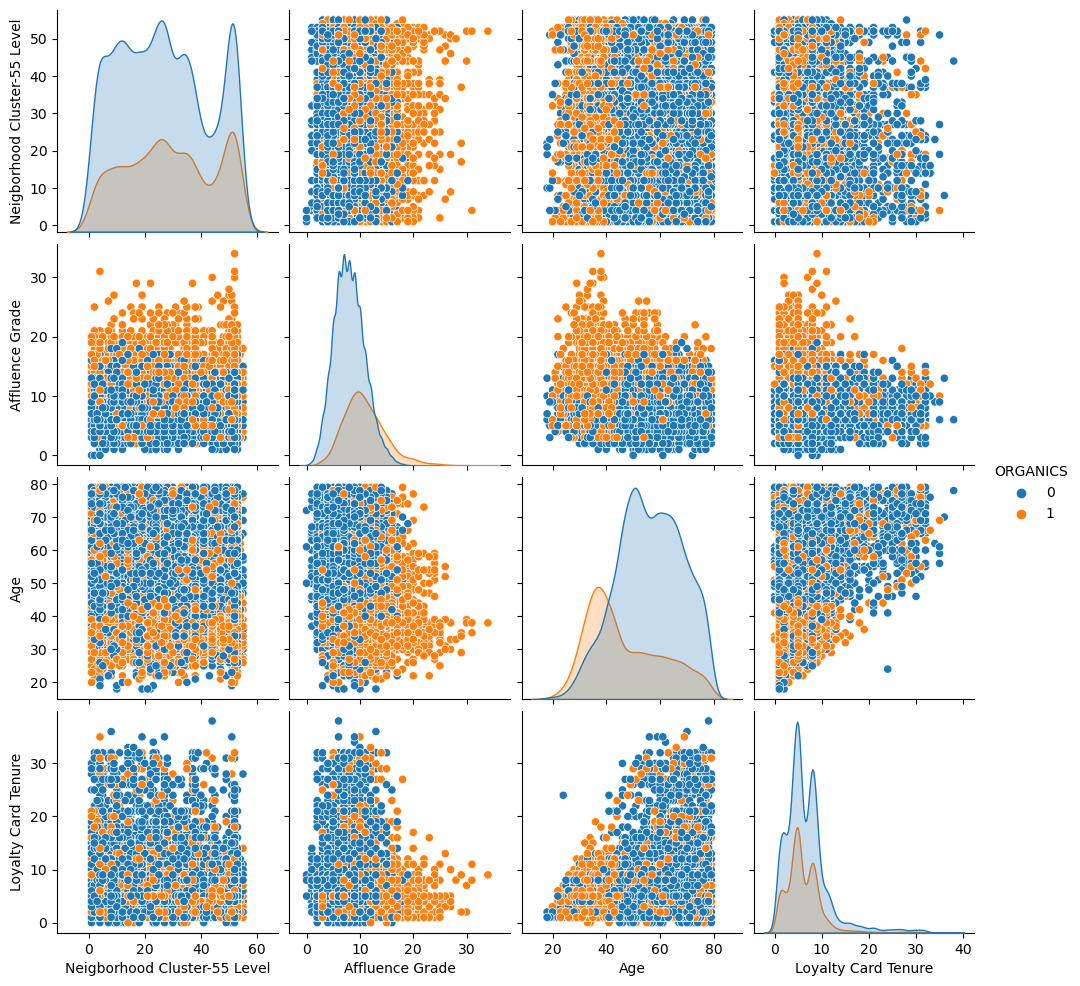

In [24]:
sns.pairplot(df, hue='ORGANICS')
plt.show()

## Calculate and display the Phik matrix (including categorical variables)

interval columns not set, guessing: ['Neigborhood Cluster-55 Level', 'Affluence Grade', 'Age', 'Loyalty Card Tenure']


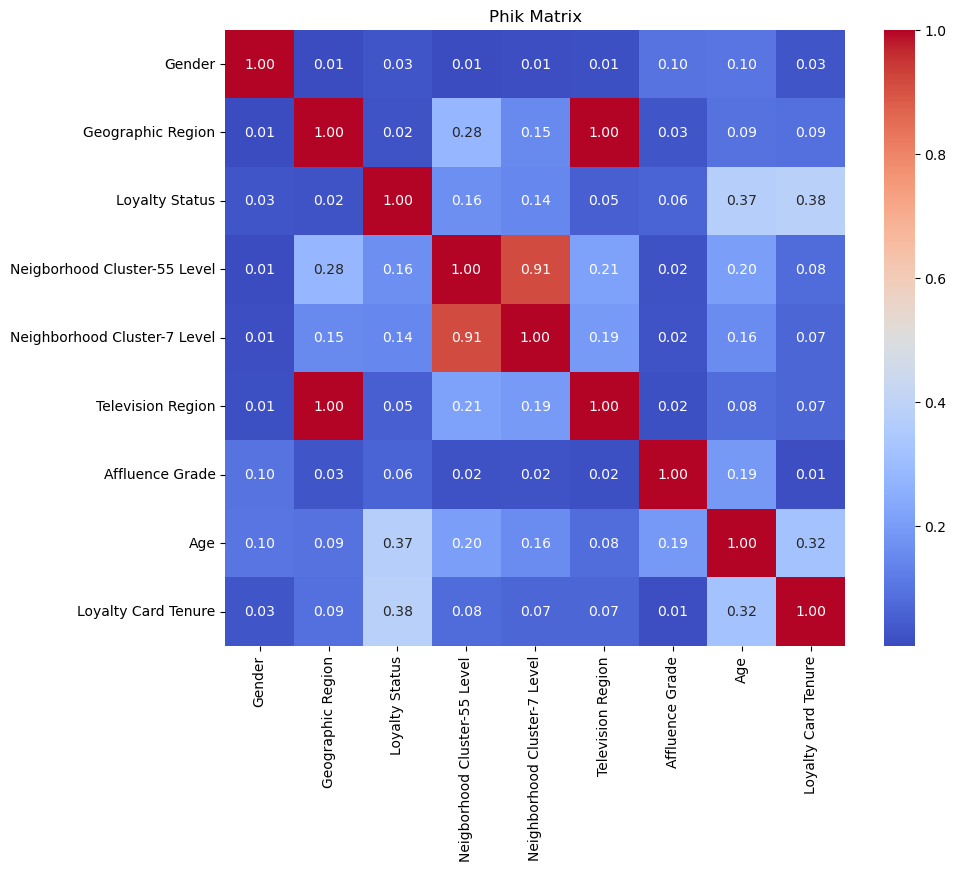

In [25]:
df1=df.drop(columns=['ORGANICS'])
phik_corr = df1.phik_matrix()
plt.figure(figsize=(10, 8))
sns.heatmap(phik_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Phik Matrix")
plt.show()

### From the above result we can clearly see {'Neigborhood Cluster-55 Level', 'Neighborhood Cluster-7 Level'} correlated with the value of 0.91 and Geographic Region' and 'Television Region' are highly correlated with the value of 1 

In [26]:
columns_to_drop=['Television Region','Neigborhood Cluster-55 Level']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Gender,Geographic Region,Loyalty Status,Neighborhood Cluster-7 Level,Affluence Grade,Age,Loyalty Card Tenure,ORGANICS
2,F,Midlands,Silver,D,5,70,8,1
3,M,Midlands,Tin,F,10,65,7,1
4,F,Midlands,Tin,A,11,68,8,0
6,F,Midlands,Tin,A,11,74,8,0
7,M,North,Tin,D,13,62,5,0


## Distribution of numerical features

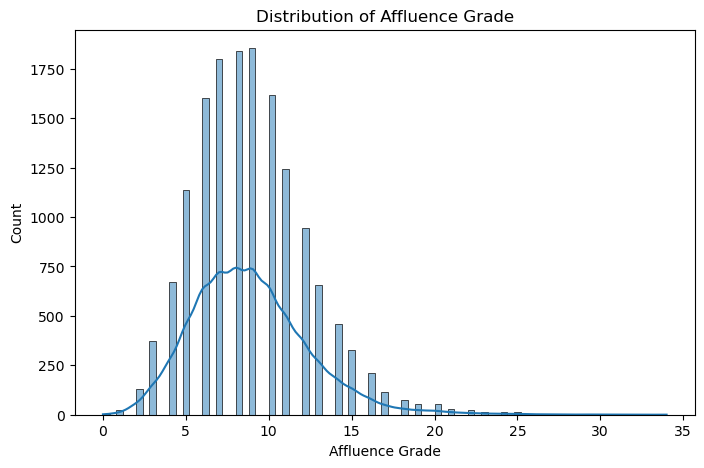

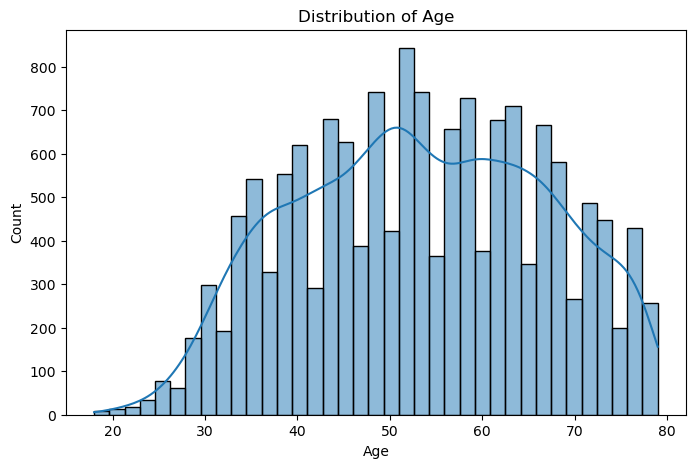

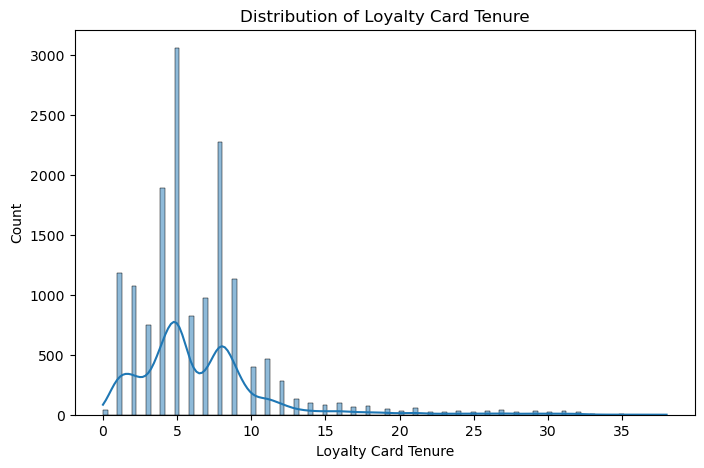

In [27]:
for column in df.select_dtypes(include=['int32','int64', 'float64']).columns:
    if column !='ORGANICS':
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

## Handling the outliers

In [28]:
# Set a threshold for the Z-score (e.g., 3 standard deviations)
z_score_threshold = 3

# Identify numerical features
numerical_features = df.select_dtypes(include=['int32', 'float64', 'int64']).columns

# Copy the original DataFrame to preserve the original data
df_no_outliers = df.copy()

# Handle outliers for numerical features using Z-score
for feature in numerical_features:
    z_scores = stats.zscore(df[feature])
    outliers = (abs(z_scores) > z_score_threshold)
    
    # Replace outliers with the mean of the feature
    mean_value = df[feature].mean()
    df_no_outliers.loc[outliers, feature] = mean_value

# Display the resulting DataFrame without outliers for numerical features
df_no_outliers.head()

,Gender,Geographic Region,Loyalty Status,Neighborhood Cluster-7 Level,Affluence Grade,Age,Loyalty Card Tenure,ORGANICS
2,F,Midlands,Silver,D,5.0,70.0,8.0,1.0
3,M,Midlands,Tin,F,10.0,65.0,7.0,1.0
4,F,Midlands,Tin,A,11.0,68.0,8.0,0.0
6,F,Midlands,Tin,A,11.0,74.0,8.0,0.0
7,M,North,Tin,D,13.0,62.0,5.0,0.0


## Before handling outliers

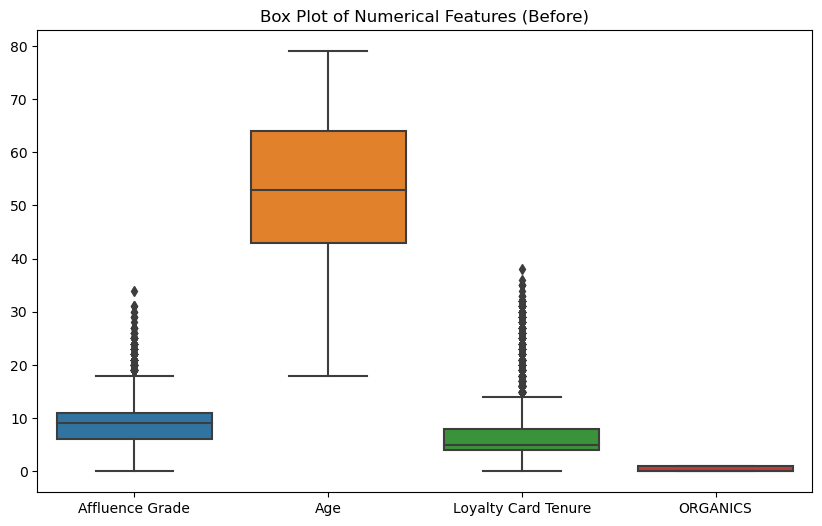

In [29]:
# Before handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['int32','float64', 'int64']))
plt.title('Box Plot of Numerical Features (Before)')
plt.show()

## After handling outliers

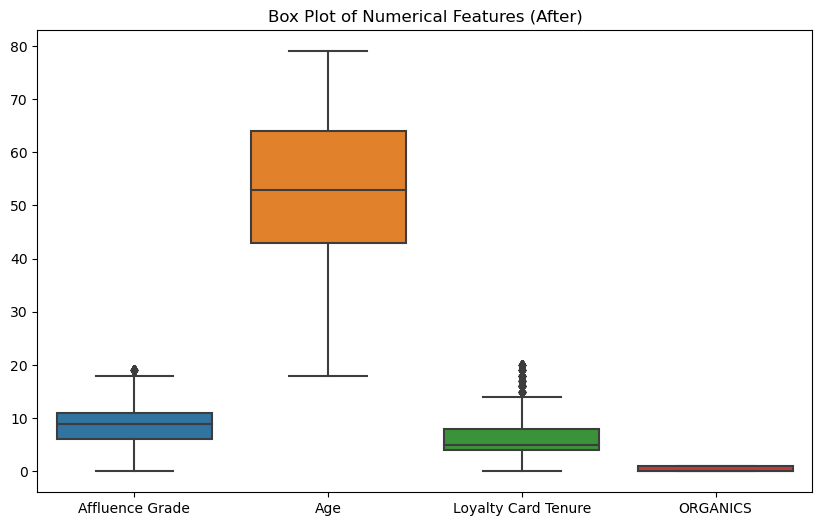

In [30]:
# After handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers.select_dtypes(include=['int32','float64', 'int64']))
plt.title('Box Plot of Numerical Features (After)')
plt.show()

## Count plots for categorical features

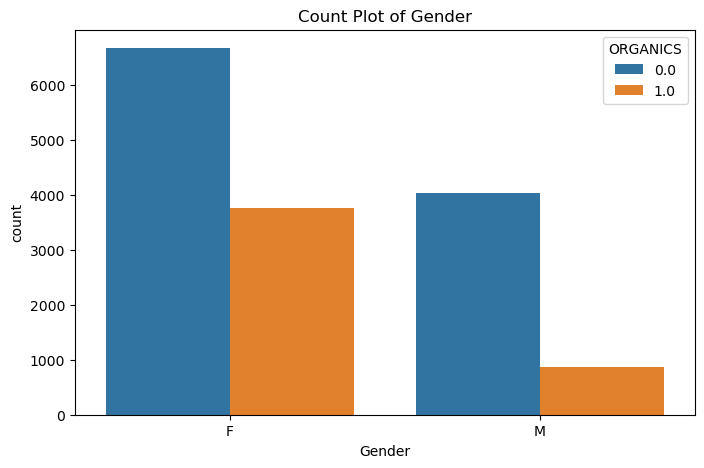

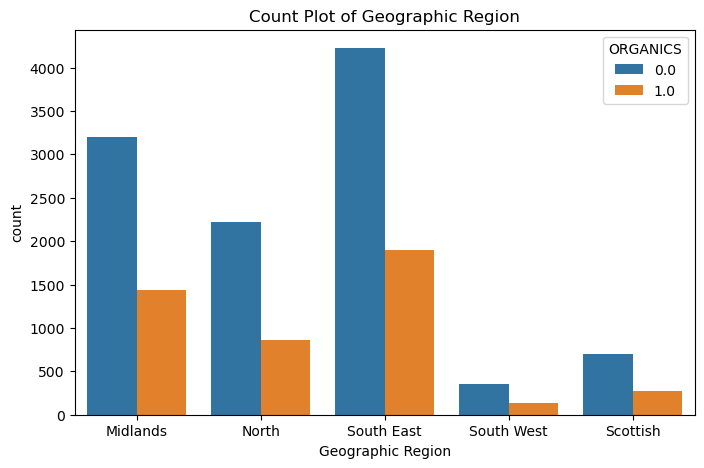

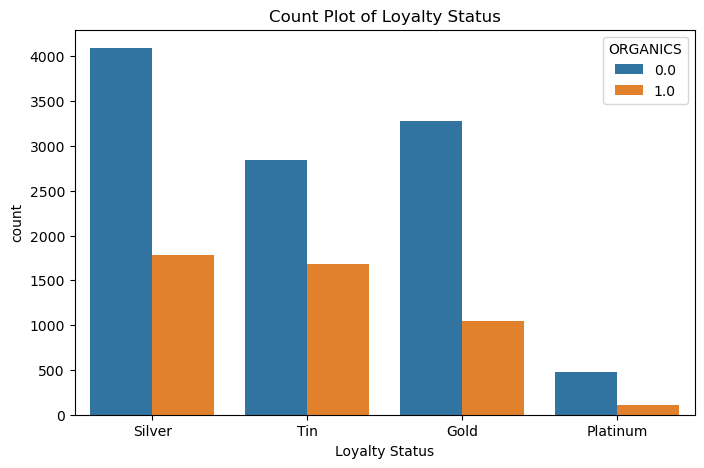

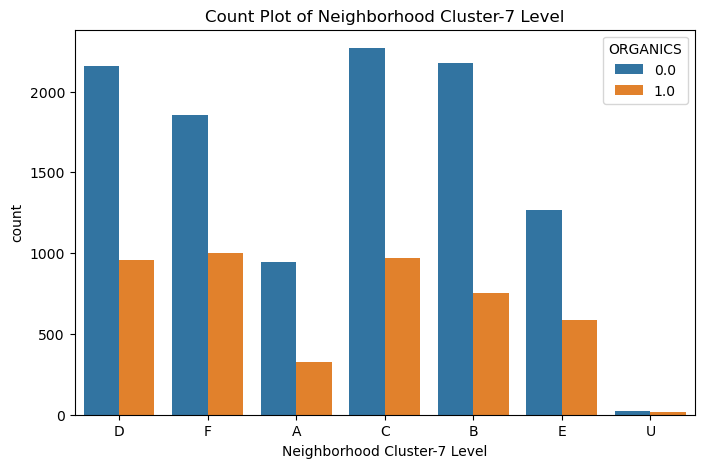

In [31]:
for column in df_no_outliers.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_no_outliers, x=column, hue='ORGANICS')
    plt.title(f'Count Plot of {column}')
    plt.show()

In [32]:
df_no_outliers.to_csv('data/outlier_removed_organics.csv', index=False)

In [33]:
df_no_outliers.isnull().sum()

Gender                          0
Geographic Region               0
Loyalty Status                  0
Neighborhood Cluster-7 Level    0
Affluence Grade                 0
Age                             0
Loyalty Card Tenure             0
ORGANICS                        0
dtype: int64

In [34]:
numerical_columns = df_no_outliers.select_dtypes(include=['int32','int64', 'float64']).columns
categorical_columns = df_no_outliers.select_dtypes(include='object').columns

In [35]:
numerical_columns

Index(['Affluence Grade', 'Age', 'Loyalty Card Tenure', 'ORGANICS'], dtype='object')

In [36]:
categorical_columns

Index(['Gender', 'Geographic Region', 'Loyalty Status',
       'Neighborhood Cluster-7 Level'],
      dtype='object')